### Manahil Fatima Anwar
### 20K-0134
### BAI-7A
### CV Lab 04

### Task 02 (Linear Filtering)

(-0.5, 2047.5, 1366.5, -0.5)

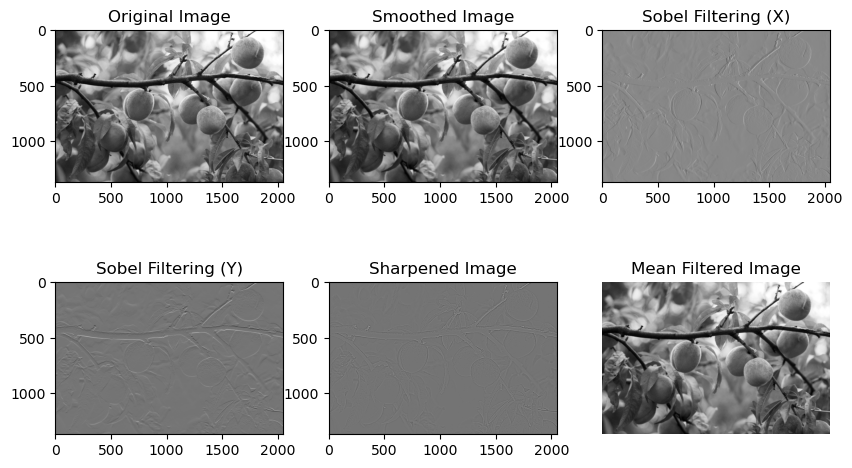

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cv_lab04.jpg', cv2.IMREAD_GRAYSCALE)

sigma = 1.5
gaussian_filtered_image = cv2.GaussianBlur(image, (0, 0), sigma)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

laplacian = cv2.Laplacian(gaussian_filtered_image, cv2.CV_64F)

mean_filtered_image = cv2.blur(image, (5, 5))

plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_filtered_image, cmap="gray")
plt.title('Smoothed Image')

plt.subplot(2, 3, 3)
plt.imshow(sobel_x, cmap="gray")
plt.title('Sobel Filtering (X)')

plt.subplot(2, 3, 4)
plt.imshow(sobel_y, cmap="gray")
plt.title('Sobel Filtering (Y)')

plt.subplot(2, 3, 5)
plt.imshow(laplacian, cmap="gray")
plt.title('Sharpened Image')

plt.subplot(2, 3, 6)
plt.imshow(mean_filtered_image, cmap="gray")
plt.title('Mean Filtered Image')

plt.axis('off')

### Task 04 (Fourier Transformations)

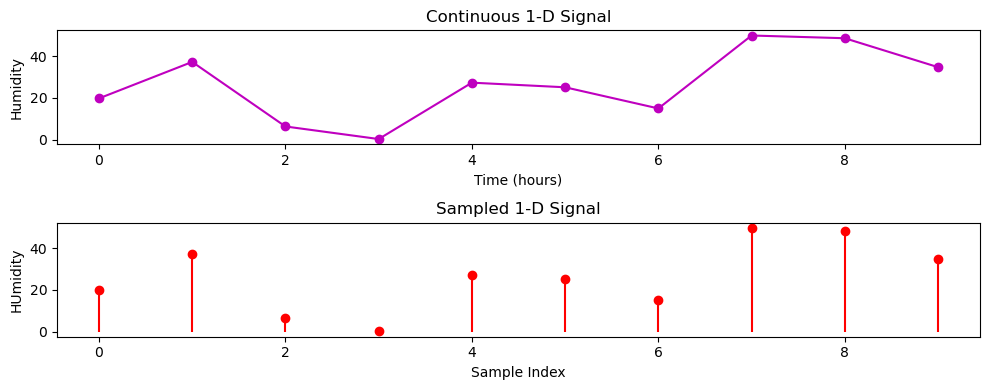

In [2]:
import numpy as np
import random

continuous_signal = np.array([round(random.uniform(0, 50), 1) for _ in range(10)])
sampled_indices = np.arange(0, len(continuous_signal))
sampled_signal = continuous_signal[sampled_indices]
time_axis = np.arange(0, len(continuous_signal))

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(time_axis, continuous_signal, marker='o', linestyle='-', color='m')
plt.title("Continuous 1-D Signal")
plt.xlabel("Time (hours)")
plt.ylabel("Humidity")

plt.subplot(2, 1, 2)
plt.stem(sampled_indices, sampled_signal, basefmt=" ", markerfmt="ro", linefmt="-r")
plt.title("Sampled 1-D Signal")
plt.xlabel("Sample Index")
plt.ylabel("HUmidity")
plt.tight_layout()
plt.show()

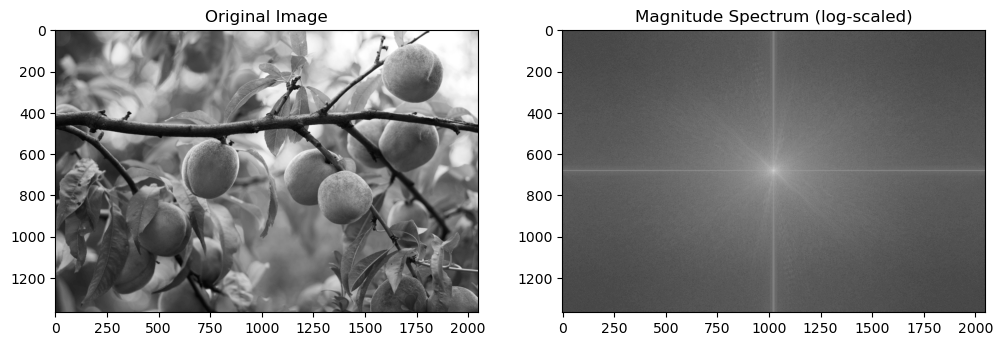

In [3]:
image = cv2.imread('cv_lab04.jpg', cv2.IMREAD_GRAYSCALE)

fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

magnitude_spectrum = np.log(np.abs(fourier_transform_shifted) + 1) # Avoid log(0) by adding 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (log-scaled)')
plt.show()

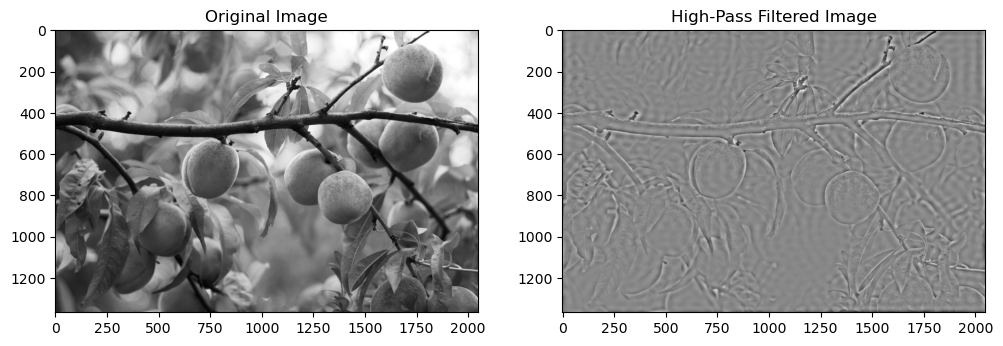

In [4]:
rows, cols = image.shape
center_x, center_y = rows // 2, cols // 2
radius = 35

mask = np.ones((rows, cols), dtype=np.uint8)
cv2.circle(mask, (center_y, center_x), radius, 0, -1)

filtered_spectrum = fourier_transform_shifted * mask

filtered_spectrum_shifted = np.fft.ifftshift(filtered_spectrum)

filtered_image = np.fft.ifft2(filtered_spectrum_shifted).real

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.show()

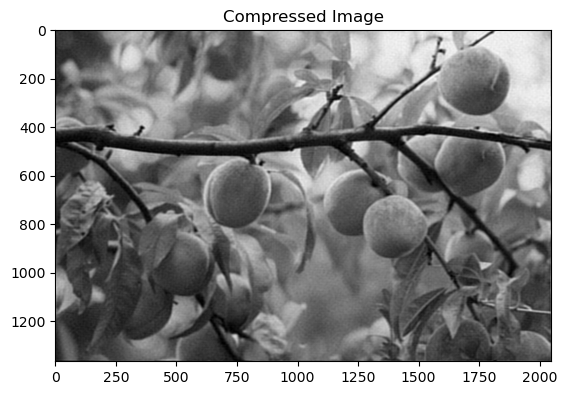

In [5]:
filtered_fourier_transform = np.fft.fft2(image)
threshold = 100000

filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0
compressed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)))

plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()